Python Version: 3.11.4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1=pd.read_csv('../DATA/cville_monthly_mean_temp.csv')
data1.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual
0,2000,34.0,42.2,49.5,54.4,65.4,72.7,71.7,72.6,65.3,58,43.4,29.7,54.9
1,2001,35.2,40.1,43.0,56.8,62.2,71.6,71.5,75.5,64.9,55.3,52.1,42.7,55.9
2,2002,41.6,40.8,46.5,57.6,61.9,73.6,76.7,76.2,68.9,55.7,45,36.1,56.7
3,2003,31.0,34.1,47.7,55.2,61.0,69.0,74.9,75.7,66.3,55,51.2,37.1,54.9
4,2004,32.1,36.8,48.2,56.4,69.1,71.1,74.9,72.0,68.0,56.6,49,39.1,56.1


In [4]:
df=pd.read_csv('../DATA/cville_monthly_mean_temp.csv')
df.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual
0,2000,34.0,42.2,49.5,54.4,65.4,72.7,71.7,72.6,65.3,58,43.4,29.7,54.9
1,2001,35.2,40.1,43.0,56.8,62.2,71.6,71.5,75.5,64.9,55.3,52.1,42.7,55.9
2,2002,41.6,40.8,46.5,57.6,61.9,73.6,76.7,76.2,68.9,55.7,45,36.1,56.7
3,2003,31.0,34.1,47.7,55.2,61.0,69.0,74.9,75.7,66.3,55,51.2,37.1,54.9
4,2004,32.1,36.8,48.2,56.4,69.1,71.1,74.9,72.0,68.0,56.6,49,39.1,56.1


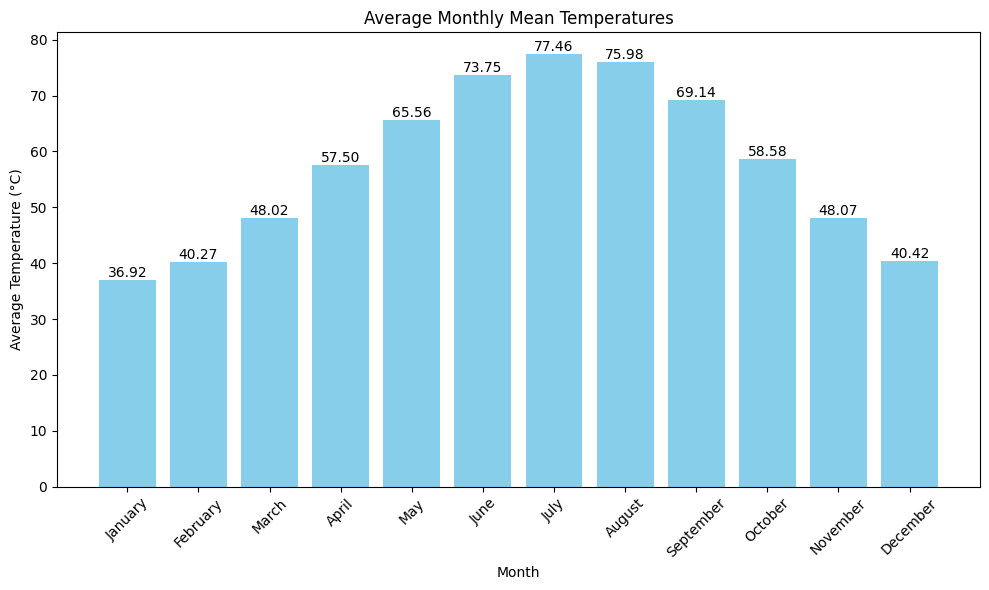

In [7]:
df.replace('M', pd.NA, inplace=True)

# Drop annual temperature
if 'Annual' in df.columns:
    df = df.drop(columns=['Annual'])

# Convert the data to numeric (ignores non-numeric values like NaN)
for month in df.columns[1:]:  # Skip the 'Year' column
    df[month] = pd.to_numeric(df[month], errors='coerce')

# Calculate the average mean temperature for each month
monthly_avg = df.iloc[:, 1:].mean()



# Create the bar chart
plt.figure(figsize=(10, 6))

bars = plt.bar(monthly_avg.index, monthly_avg.values, color='skyblue')

# Display exact values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
             ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Monthly Mean Temperatures')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

